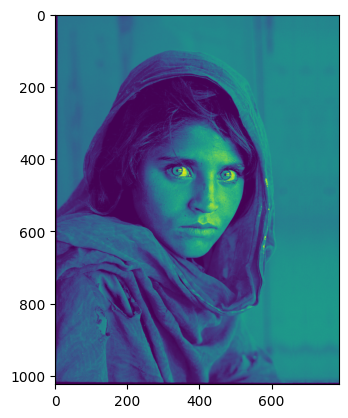

U shape: (1024, 786)
S shape: (786,)
Vt shape: (786, 786)


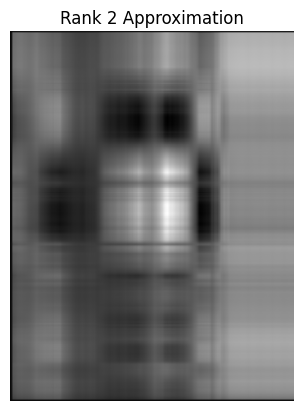

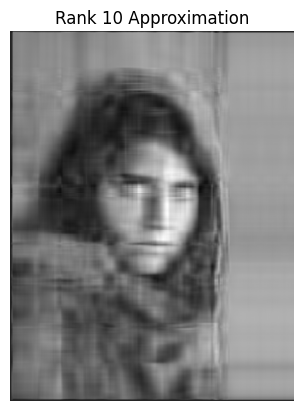

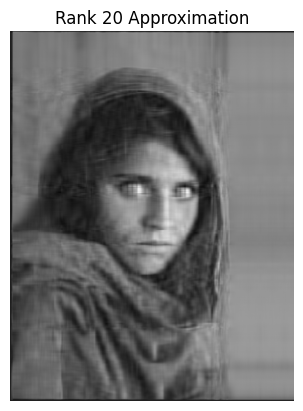

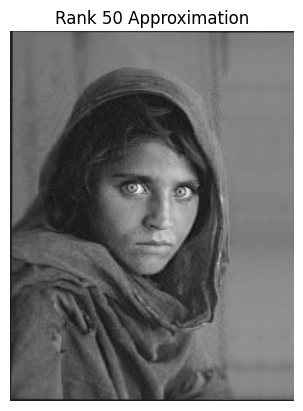

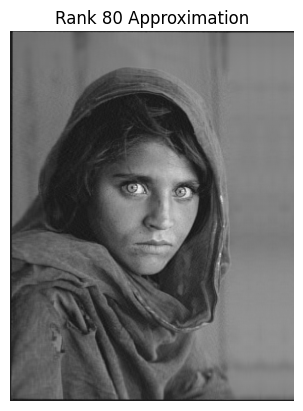

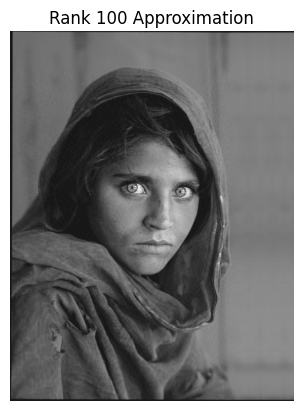

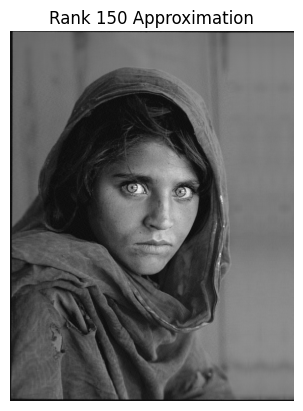

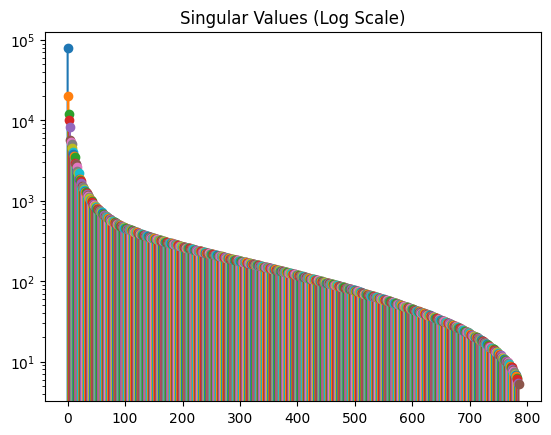

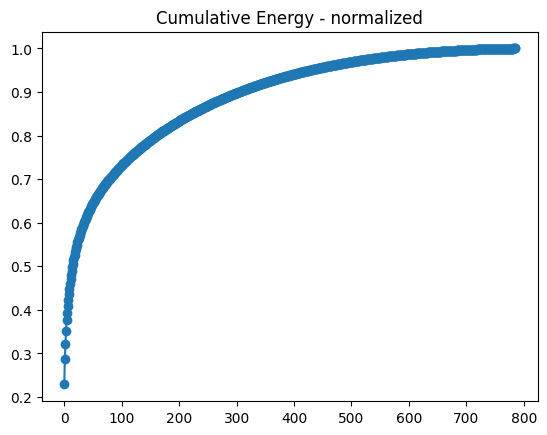

In [ ]:
from anyio import sleep
from matplotlib.image import imread 
import matplotlib.pyplot as plt
import numpy as np

A = imread('./DATA/image2.jpg')
X = np.mean(A, -1)  # Convert to grayscale by averaging color channels
img = plt.imshow(X)
plt.show()

U, S, Vt = np.linalg.svd(X, full_matrices=False)

print(f'U shape: {U.shape}')
print(f'S shape: {S.shape}')
print(f'Vt shape: {Vt.shape}')

S = np.diag(S)
ranks = [2, 10, 20, 50, 80, 100, 150]
for r in ranks:
    Xr = U[:, :r] @ S[:r, :r] @ Vt[:r, :]
    plt.figure()
    plt.title(f'Rank {r} Approximation')
    plt.imshow(Xr, cmap='gray')
    plt.axis('off')
    plt.show()

plt.semilogy(S,  '-o')  # Use S directly (1D array)
plt.title('Singular Values (Log Scale)')
plt.show()

plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)), 'o-')  # Use S directly
plt.title('Cumulative Energy - normalized')
plt.show()